In [1]:
import os
from pathlib import Path

In [3]:
image_extensions = ('.jpg', '.jpeg', '.png')
images = [file for file in os.listdir() if file.lower().endswith(image_extensions)]

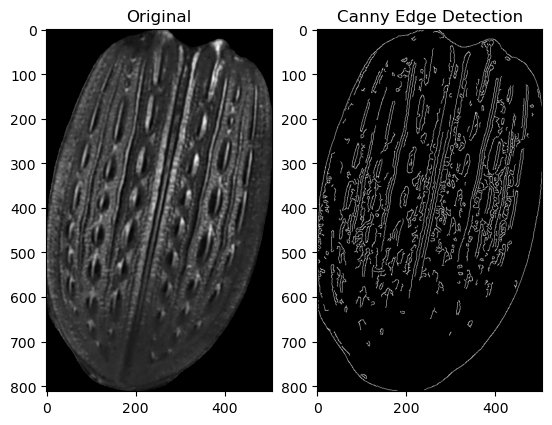

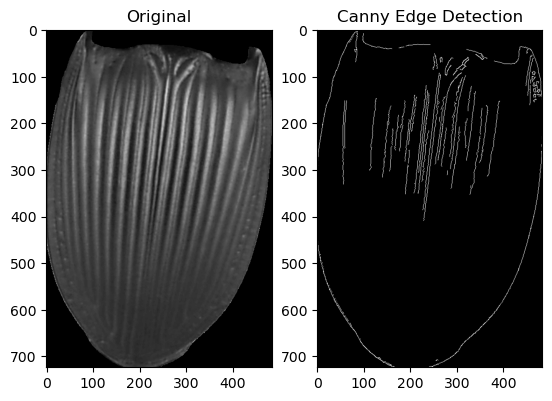

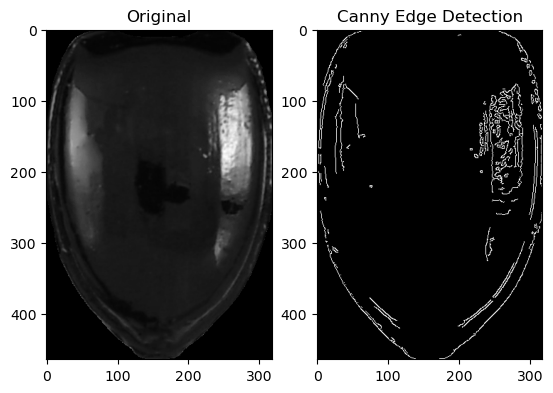

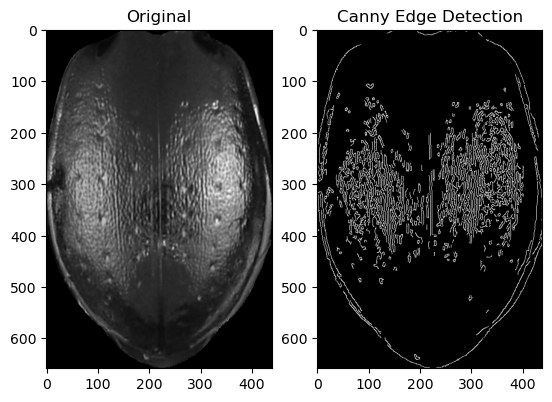

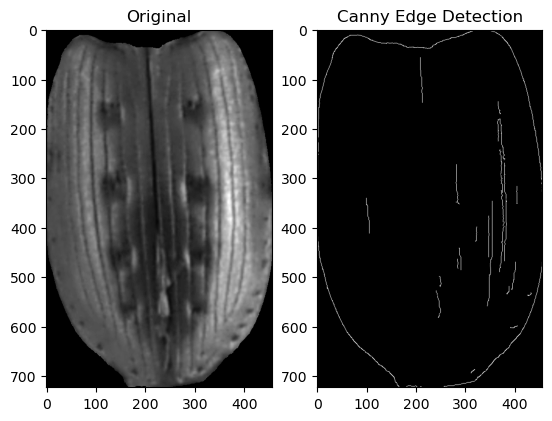

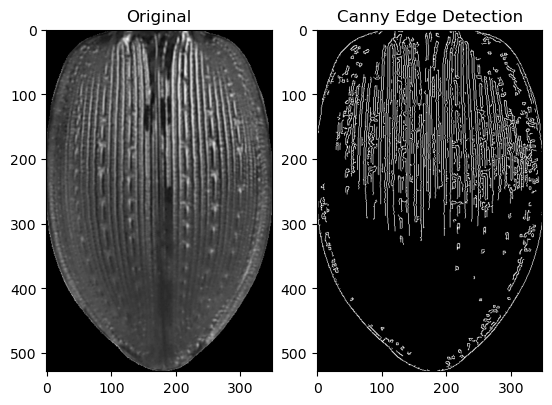

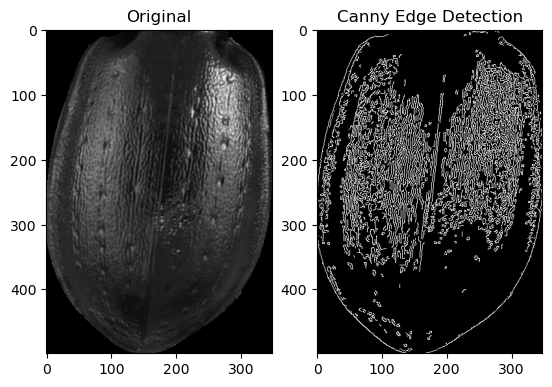

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

for im in images : 

    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 100, 7)

    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    
    plt.subplot(122)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    
    plt.show()

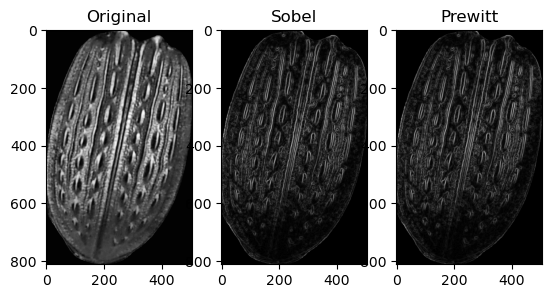

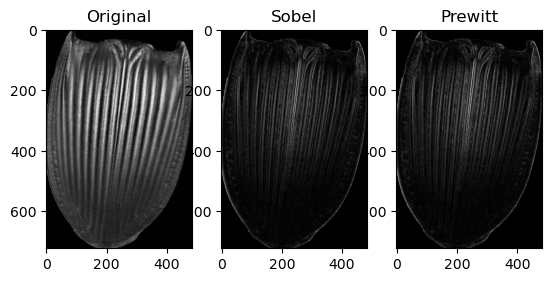

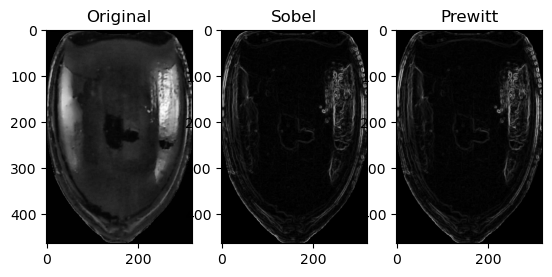

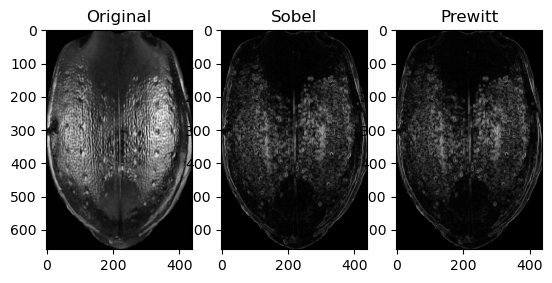

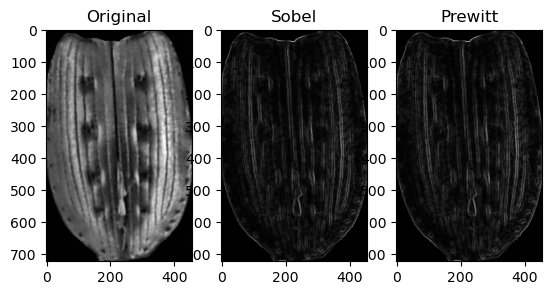

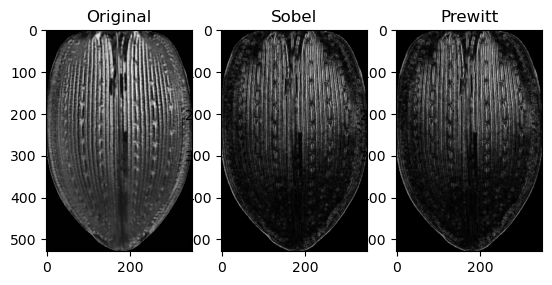

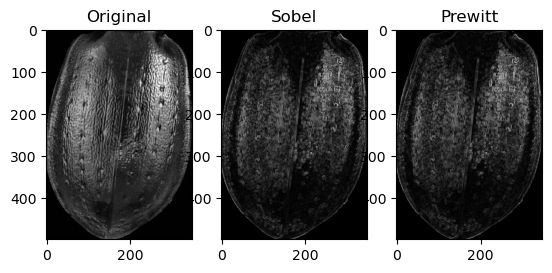

In [48]:
for im in images: 
    
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
     
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobelx, sobely)  
    
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_32F, kernely)
    prewitt_edges = cv2.magnitude(prewittx, prewitty)
    
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    
    plt.subplot(132)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel')
    
    plt.subplot(133)
    plt.imshow(prewitt_edges, cmap='gray')
    plt.title('Prewitt')
    
    plt.show()


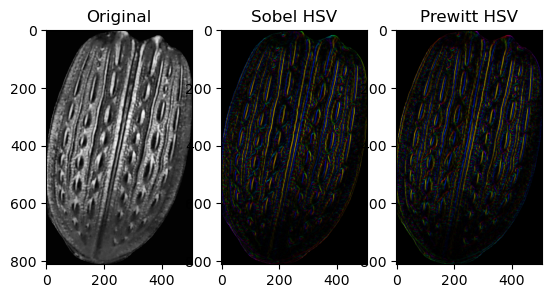

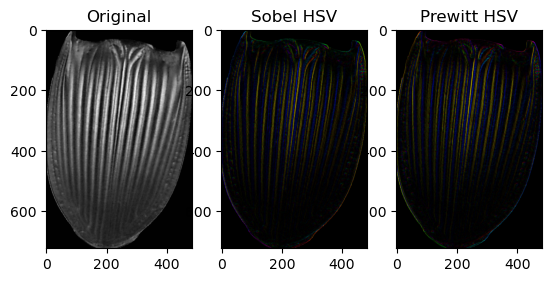

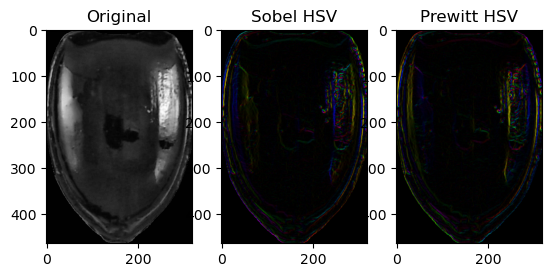

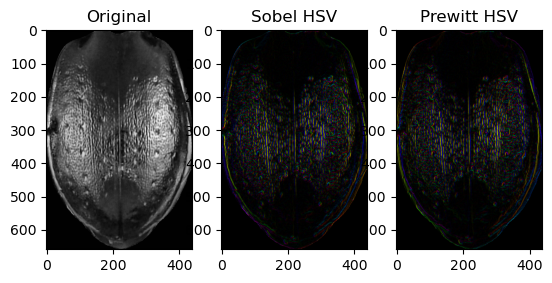

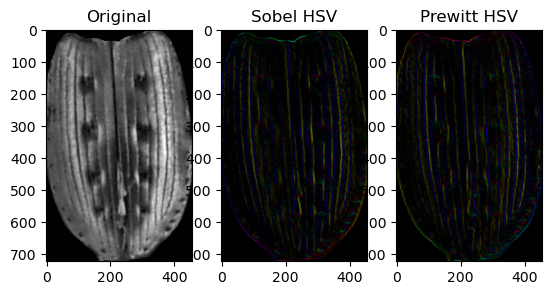

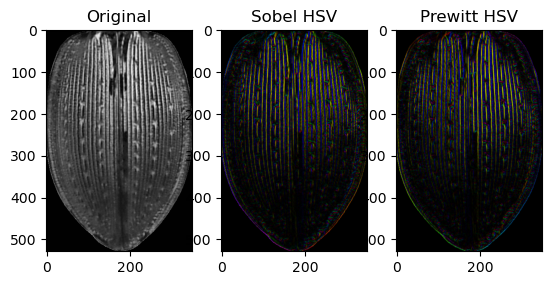

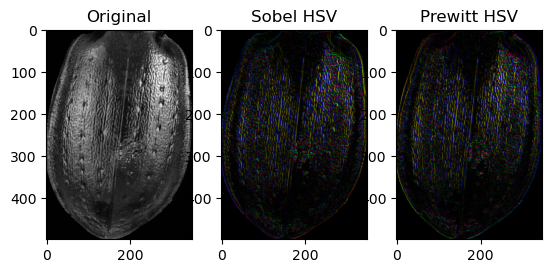

In [49]:
def generate_hsv_map(magnitude, angle):
    
    magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    angle_norm = np.uint8(angle / 2)
    saturation = np.full_like(magnitude_norm, 255, dtype=np.uint8)
    magnitude_norm = np.uint8(magnitude_norm)
    angle_norm = cv2.resize(angle_norm, (magnitude_norm.shape[1], magnitude_norm.shape[0]))
    hsv_image = cv2.merge([angle_norm, saturation, magnitude_norm])
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    
    return bgr_image

for im in images: 

    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_magnitude = cv2.magnitude(sobelx, sobely)
    sobel_angle = cv2.phase(sobelx, sobely, angleInDegrees=True)
    sobel_hsv = generate_hsv_map(sobel_magnitude, sobel_angle)
    
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_32F, kernely)
    prewitt_magnitude = cv2.magnitude(prewittx, prewitty)
    prewitt_angle = cv2.phase(prewittx, prewitty, angleInDegrees=True)
    prewitt_hsv = generate_hsv_map(prewitt_magnitude, prewitt_angle)
    
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    
    plt.subplot(132)
    plt.imshow(sobel_hsv, cmap='hsv')
    plt.title('Sobel HSV')
    
    plt.subplot(133)
    plt.imshow(prewitt_hsv, cmap='hsv')
    plt.title('Prewitt HSV')
    
    plt.show()

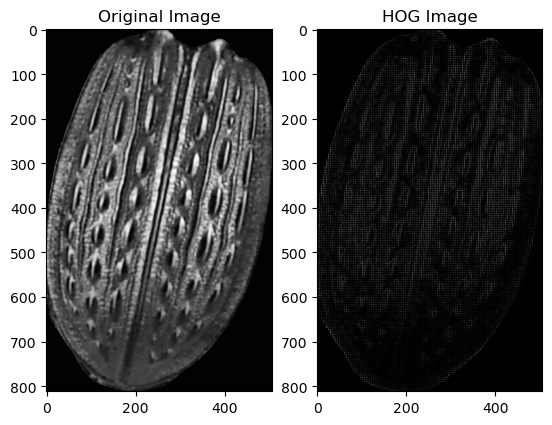

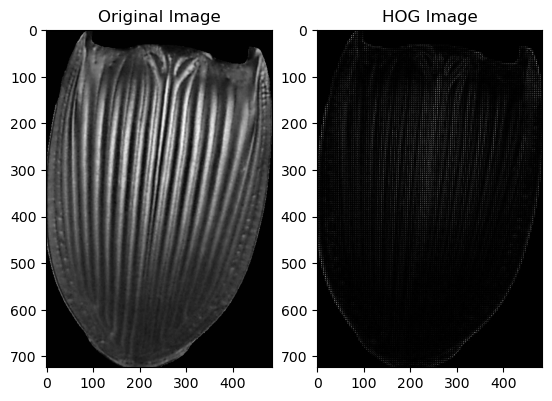

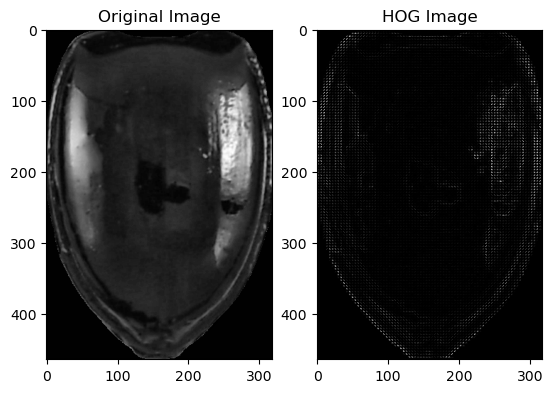

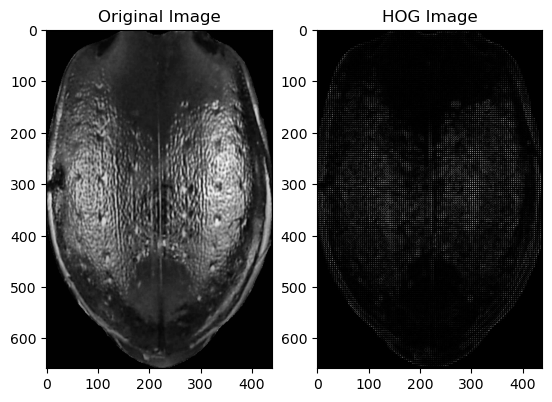

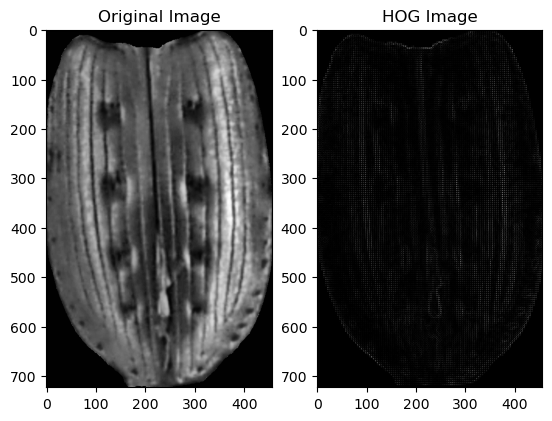

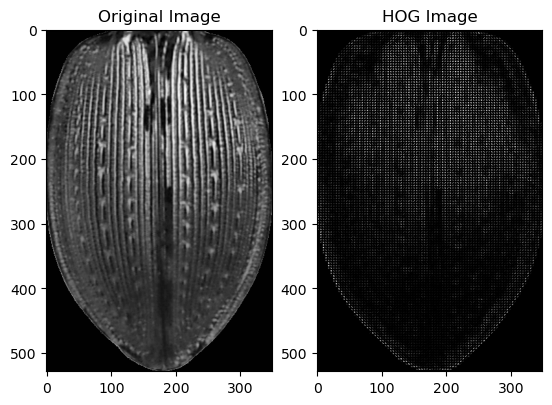

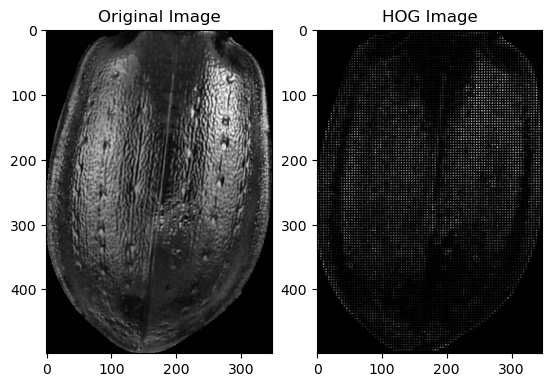

In [54]:
from skimage.feature import hog
from skimage import exposure

for im in images: 
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    
    hog_features, hog_image = hog(image, 
                                  orientations=15, 
                                  pixels_per_cell=(4,4), 
                                  cells_per_block=(2,2), 
                                  block_norm='L2-Hys', 
                                  visualize=True, 
                                  feature_vector=True)

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))
    
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title('HOG Image')
    
    plt.show()

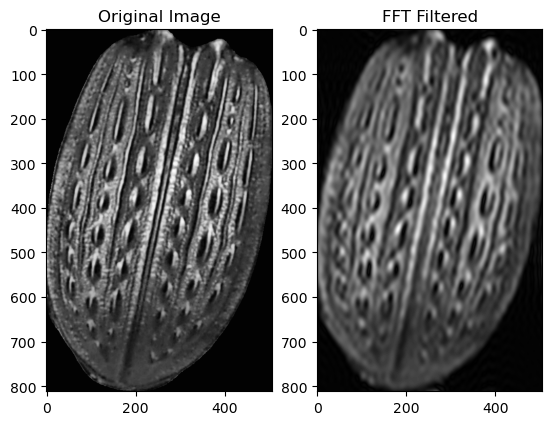

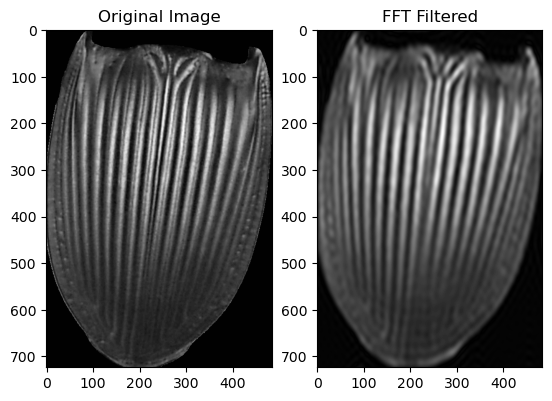

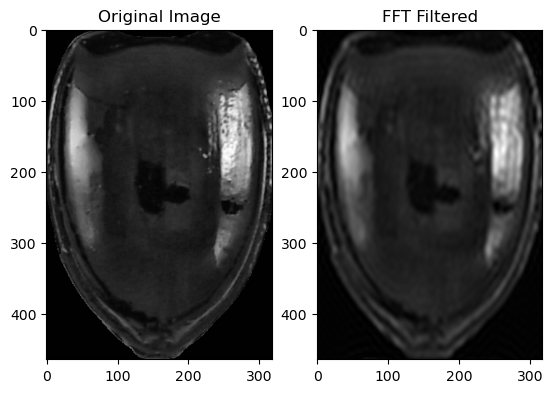

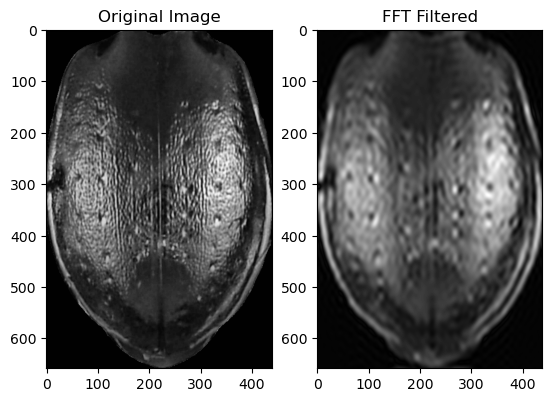

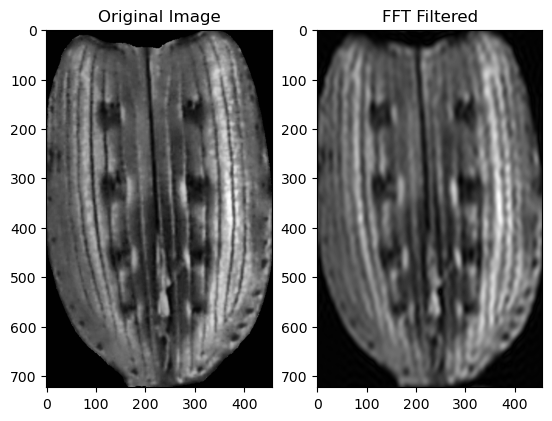

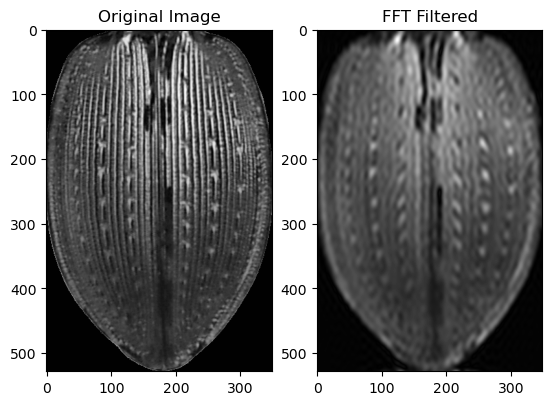

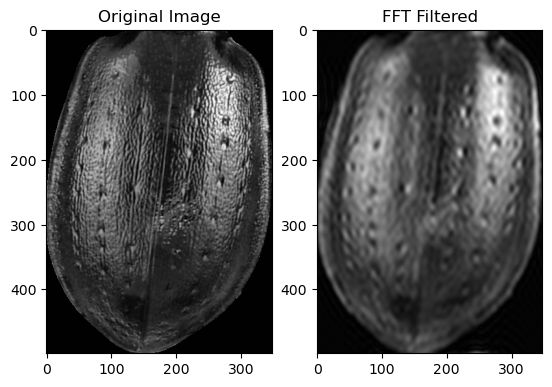

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for im in images:
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    
    f_shift = f_shift * mask
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(img_back, cmap='gray')
    plt.title('FFT Filtered')
    
    plt.show()


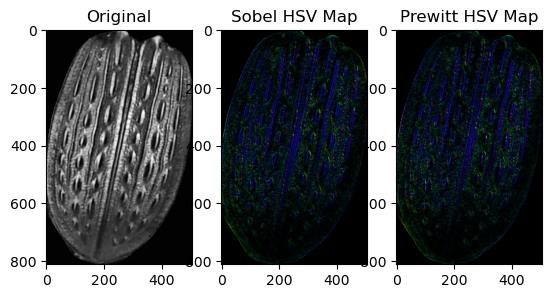

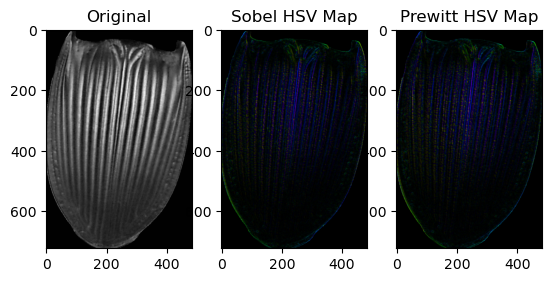

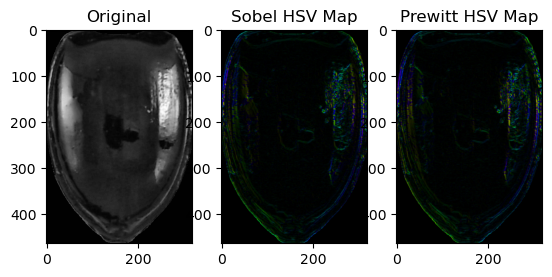

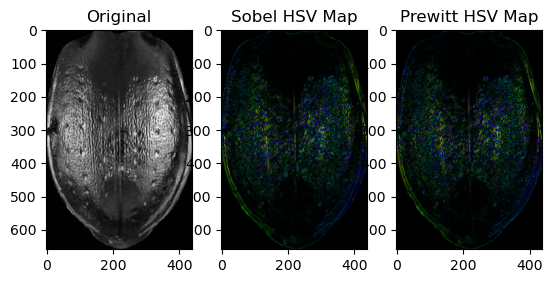

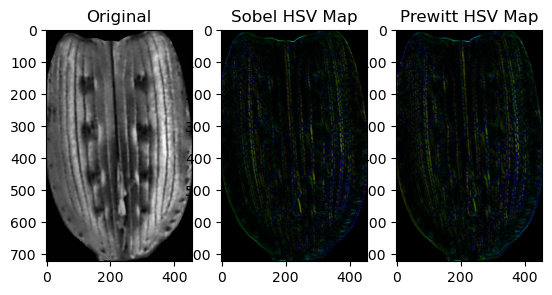

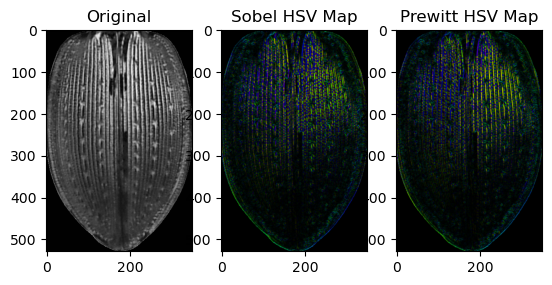

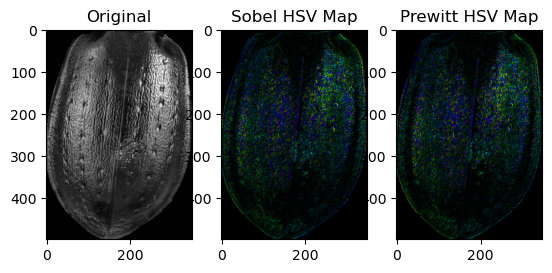

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_hsv_map(magnitude, angle):
    
    magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    angle_norm = np.uint8(angle / 2)
    saturation = np.full_like(magnitude_norm, 255, dtype=np.uint8)
    magnitude_norm = np.uint8(magnitude_norm)
    angle_norm = cv2.resize(angle_norm, (magnitude_norm.shape[1], magnitude_norm.shape[0]))
    hsv_image = cv2.merge([angle_norm, saturation, magnitude_norm])
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return bgr_image

for im in images: 
    
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel_magnitude = cv2.magnitude(sobelx, sobely)
    sobel_angle_radians = np.arctan2(sobely, sobelx)
    sobel_angle_degrees = np.degrees(sobel_angle_radians)
    sobel_hsv = generate_hsv_map(sobel_magnitude, sobel_angle_degrees)
    
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_32F, kernely)
    
    prewitt_magnitude = cv2.magnitude(prewittx, prewitty)
    prewitt_angle_radians = np.arctan2(prewitty, prewittx)
    prewitt_angle_degrees = np.degrees(prewitt_angle_radians)
    prewitt_hsv = generate_hsv_map(prewitt_magnitude, prewitt_angle_degrees)
    
    
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    
    plt.subplot(132)
    plt.imshow(sobel_hsv, cmap='hsv')
    plt.title('Sobel HSV Map')
    
    plt.subplot(133)
    plt.imshow(prewitt_hsv, cmap='hsv')
    plt.title('Prewitt HSV Map')
    
    plt.show()
